## Configuración Inicial e Importaciones

In [121]:
import os
import re
import random
from collections import Counter, defaultdict 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # Para gráficos mas pintosos
import networkx as nx # Para el análisis de grafos 

plt.style.use('seaborn-v0_8-whitegrid') # Estilo
sns.set_palette("viridis") # Paleta 

from IPython.display import display, HTML

print("Librerías importadas exitosamente.")

Librerías importadas exitosamente.


## Carga y Preprocesamiento del Corpus

In [122]:
def cargar_corpus_desde_carpeta(ruta_carpeta_corpus):
    corpus_palabras_total = []
    archivos_leidos = 0
    archivos_descartados = 0
    
    if not os.path.exists(ruta_carpeta_corpus):
        print(f"Error: La carpeta '{ruta_carpeta_corpus}' no existe.")
        return [], 0, 0

    print(f"Leyendo archivos: '{ruta_carpeta_corpus}'...")
    for nombre_archivo in os.listdir(ruta_carpeta_corpus):
        if nombre_archivo.endswith(".txt"):
            ruta_completa = os.path.join(ruta_carpeta_corpus, nombre_archivo)
            try:
                with open(ruta_completa, 'r', encoding='utf-8') as archivo:
                    contenido = archivo.read()
                    palabras_cancion = contenido.split() 
                    
                    if len(palabras_cancion) >= 200:
                        corpus_palabras_total.extend(palabras_cancion)
                        archivos_leidos += 1
                    else:
                        archivos_descartados +=1
            except Exception as e:
                print(f"Error al leer el archivo '{nombre_archivo}': {e}")
                archivos_descartados += 1
                
    if archivos_descartados > 0:
        print(f"Se descartaron {archivos_descartados} archivos por no cumplir el criterio o por errores de lectura.")
    return corpus_palabras_total, archivos_leidos

RUTA_CARPETA_LETRAS = r"C:\Users\LENOVO\OneDrive - UPB\Archivos Materias\Tercer Semestre\Procesos Estocasticos\Proyecto Final PE\Proyecto Final\corpus"

corpus_palabras, num_canciones_cargadas = cargar_corpus_desde_carpeta(RUTA_CARPETA_LETRAS)

if corpus_palabras:
    print(f"Número de canciones cargadas: {num_canciones_cargadas}")
    print(f"Número total de palabras en el corpus: {len(corpus_palabras)}")
else:
    print("\nEl corpus está vacío.")

Leyendo archivos: 'C:\Users\LENOVO\OneDrive - UPB\Archivos Materias\Tercer Semestre\Procesos Estocasticos\Proyecto Final PE\Proyecto Final\corpus'...
Número de canciones cargadas: 53
Número total de palabras en el corpus: 14533


## Construcción del Vocabulario y Espacio de Estados

In [123]:

if corpus_palabras:

    vocabulario = sorted(list(set(corpus_palabras)))
    num_estados_unicos = len(vocabulario)
    
    print(f"Número de estados (palabras únicas) en el vocabulario: {num_estados_unicos}")
    
    # Mostrar una muestra del vocabulario
    num_palabras_muestra_vocab = min(10, num_estados_unicos) 
    if num_palabras_muestra_vocab > 0:
        print(f"Ejemplo de {num_palabras_muestra_vocab} palabras del vocabulario: {random.sample(vocabulario, num_palabras_muestra_vocab)}")
    else:
        print("El vocabulario está vacío.")


Número de estados (palabras únicas) en el vocabulario: 2391
Ejemplo de 10 palabras del vocabulario: ['rol', 'meu', 'andas', 'una', 'brote', 'madures', 'chegou', 'barreras', 'pasare', 'aplicas']


## Construcción del Modelo de Markov (Frecuencias y Probabilidades de Transición)

In [124]:

def construir_tabla_transiciones(corpus):

    tabla_frecuencias = defaultdict(Counter)
    for i in range(len(corpus) - 1):
        palabra_actual = corpus[i]
        siguiente_palabra = corpus[i+1]
        tabla_frecuencias[palabra_actual][siguiente_palabra] += 1

    # Convertir las frecuencias a probabilidades
    tabla_probabilidades = defaultdict(dict)
    for palabra_actual, contador_siguientes in tabla_frecuencias.items():
        total_apariciones_actual = float(sum(contador_siguientes.values()))
        for siguiente_palabra, frecuencia in contador_siguientes.items():
            tabla_probabilidades[palabra_actual][siguiente_palabra] = frecuencia / total_apariciones_actual
            
    return tabla_probabilidades

if corpus_palabras:
    modelo_markov = construir_tabla_transiciones(corpus_palabras)
    print(f"Número de estados (palabras) con transiciones de salida definidas: {len(modelo_markov)}")

    # Mostrar un ejemplo de transiciones desde una palabra común 
    palabras_comunes_para_ejemplo = ["de", "la", "que", "el", "amor", "rock"]
    palabra_ejemplo_modelo = None
    for p_comun in palabras_comunes_para_ejemplo:
        if p_comun in modelo_markov:
            palabra_ejemplo_modelo = p_comun
            break

    if palabra_ejemplo_modelo:
        print(f"\nEjemplo de las transiciones más probables desde la palabra '{palabra_ejemplo_modelo}':")
        # Ordenar las transiciones por probabilidad descendente para mostrar las más comunes
        transiciones_ordenadas = sorted(modelo_markov[palabra_ejemplo_modelo].items(), key=lambda item: item[1], reverse=True)
        for sig_palabra, prob in transiciones_ordenadas[:5]: # Mostrar hasta 5
            print(f"  -> '{sig_palabra}' (Probabilidad: {prob:.4f})")
    else:
        print("\nNo se pudo encontrar una palabra de ejemplo con transiciones (el modelo puede ser pequeño o estar vacío).")

Número de estados (palabras) con transiciones de salida definidas: 2391

Ejemplo de las transiciones más probables desde la palabra 'de':
  -> 'la' (Probabilidad: 0.0829)
  -> 'los' (Probabilidad: 0.0829)
  -> 'mi' (Probabilidad: 0.0645)
  -> 'un' (Probabilidad: 0.0438)
  -> 'verdad' (Probabilidad: 0.0276)


## Distribución de Probabilidad Inicial


Distribución de probabilidad inicial calculada (basada en frecuencia general de palabras).

Top 25 palabras con mayor probabilidad inicial (más frecuentes):
  1: 'que': 0.04053
  2: 'de': 0.02986
  3: 'la': 0.02979
  4: 'y': 0.02856
  5: 'no': 0.02732
  6: 'el': 0.01961
  7: 'a': 0.01865
  8: 'en': 0.01810
  9: 'te': 0.01548
  10: 'oh': 0.01514
  11: 'se': 0.01445
  12: 'me': 0.01390
  13: 'un': 0.01225
  14: 'yo': 0.01135
  15: 'mi': 0.01080
  16: 'es': 0.01011
  17: 'los': 0.00956
  18: 'uh': 0.00853
  19: 'si': 0.00819
  20: 'por': 0.00729
  21: 'quiero': 0.00716
  22: 'mas': 0.00674
  23: 'tu': 0.00674
  24: 'del': 0.00667
  25: 'ah': 0.00647


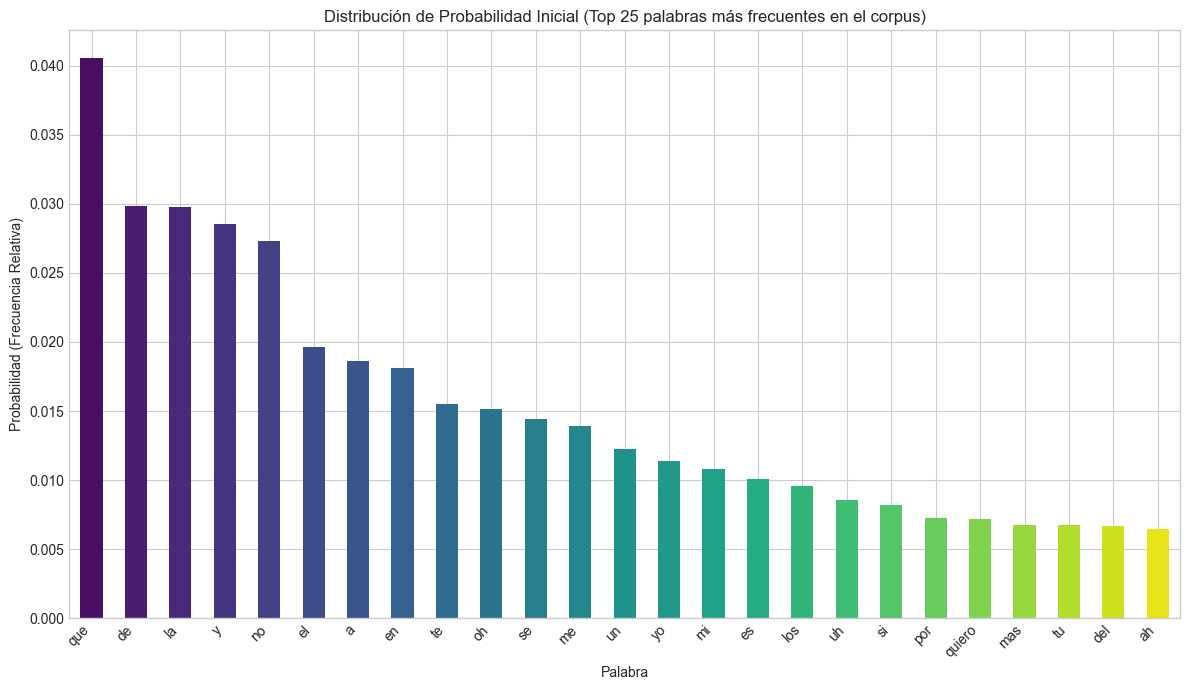

In [125]:

def calcular_distribucion_prob_inicial(corpus):
    if not corpus:
        return {}, pd.Series(dtype='float64')

    conteo_palabras_total = Counter(corpus)
    num_total_palabras_corpus = float(len(corpus))
    
    dist_inicial_probabilidades = {palabra: conteo / num_total_palabras_corpus 
                                   for palabra, conteo in conteo_palabras_total.items()}

    dist_series_ordenada = pd.Series(dist_inicial_probabilidades).sort_values(ascending=False)
    
    return dist_inicial_probabilidades, dist_series_ordenada

if corpus_palabras:

    numeroDePalabras = 25;

    distribucion_inicial_prob, dist_inicial_series = calcular_distribucion_prob_inicial(corpus_palabras)
    print("\nDistribución de probabilidad inicial calculada (basada en frecuencia general de palabras).")
    indice = 1
    if not dist_inicial_series.empty:
        print(f"\nTop {numeroDePalabras} palabras con mayor probabilidad inicial (más frecuentes):")
        for palabra, prob in dist_inicial_series.head(numeroDePalabras).items():
            print(f"  {indice}: '{palabra}': {prob:.5f}")
            indice += 1;

        # Grafico
        plt.figure(figsize=(12, 7))
        dist_inicial_series.head(numeroDePalabras).plot(kind='bar', color=sns.color_palette("viridis", numeroDePalabras))
        plt.title(f"Distribución de Probabilidad Inicial (Top {numeroDePalabras} palabras más frecuentes en el corpus)")
        plt.xlabel("Palabra")
        plt.ylabel("Probabilidad (Frecuencia Relativa)")
        plt.xticks(rotation=45, ha="right") # Rotar etiquetas para mejor legibilidad
        plt.tight_layout() # Ajustar layout para que no se corten las etiquetas
        plt.show()
    else:
        print("No hay datos para mostrar en la distribución inicial.")

else:
    print("\nNo se puede calcular la distribución inicial porque el corpus está vacío.")
    dist_inicial_series = pd.Series(dtype='float64')

## Generación de Texto

In [126]:


def GenerarEjMarkov(modelo, palabra_inicial, longitud_max=30):
    if not modelo:
        print("El modelo de Markov está vacío.")
        return palabra_inicial 

    secuencia_generada = [palabra_inicial]
    palabra_actual = palabra_inicial

    for _ in range(longitud_max - 1):
        # Verificar si hay transiciones desde la palabra actual
        if palabra_actual not in modelo or not modelo[palabra_actual]:
            break 
        
        # Obtener posibles siguientes palabras y sus probabilidades
        siguientes_posibles = list(modelo[palabra_actual].keys())
        probabilidades = list(modelo[palabra_actual].values())
        
        if not siguientes_posibles: 
            break
            
        # Elegir la siguiente palabra
        palabra_siguiente = random.choices(siguientes_posibles, weights=probabilidades, k=1)[0]
        
        secuencia_generada.append(palabra_siguiente)
        palabra_actual = palabra_siguiente
        
    return " ".join(secuencia_generada)

def palabrasEjemplo(vocab, cantidad=10):
    if not vocab or cantidad <= 0:
        return []
    return random.sample(vocab, min(cantidad, len(vocab)))


# Generacion texto
if modelo_markov and vocabulario:
    print("\n--- Sugerencias de Palabras del Vocabulario (para iniciar) ---")
    palabras_sugeridas = palabrasEjemplo(vocabulario, 10)
    if palabras_sugeridas:
        print("Ejemplos:", ", ".join(palabras_sugeridas))
    

    palabra = "rock"  
    palabra2 = "cerveza"  
    palabra3 = "frio" 
    longitud_texto = 15         


    print(f"\nGenerando texto desde '{palabra}':")

    textoejmarkov = GenerarEjMarkov(modelo_markov, palabra, longitud_max=longitud_texto)
    print(f"  -> {textoejmarkov}")      
    textoejmarkov = GenerarEjMarkov(modelo_markov, palabra, longitud_max=longitud_texto)
    print(f"  -> {textoejmarkov}")

    print(f"\nGenerando texto desde '{palabra2}' (longitud aprox. {longitud_texto}):")
    
    textoejmarkov2 = GenerarEjMarkov(modelo_markov, palabra2, longitud_max=longitud_texto)
    print(f"  -> {textoejmarkov2}")
    textoejmarkov2 = GenerarEjMarkov(modelo_markov, palabra2, longitud_max=longitud_texto)
    print(f"  -> {textoejmarkov2}")

    print(f"\nGenerando texto desde '{palabra3}' (longitud aprox. {longitud_texto}):")
    
    textoejmarkov3 = GenerarEjMarkov(modelo_markov, palabra3, longitud_max=longitud_texto)
    print(f"  -> {textoejmarkov3}")
    textoejmarkov3 = GenerarEjMarkov(modelo_markov, palabra3, longitud_max=longitud_texto)
    print(f"  -> {textoejmarkov3}")

else:
    print("\nNo se puede generar texto: el modelo de Markov o el vocabulario están vacíos.")


--- Sugerencias de Palabras del Vocabulario (para iniciar) ---
Ejemplos: galaxia, servir, sigo, palermo, queres, galope, he, cai, mujer, noche

Generando texto desde 'rock':
  -> rock donde va el culo mas quiero intoxicarme en sus caras de antes desde antes
  -> rock y frio y no puedo parir no se ge sen ge se quede aqui

Generando texto desde 'cerveza' (longitud aprox. 15):
  -> cerveza te lo que sos mal bicho your destiny is brave mal bicho asi invisible
  -> cerveza tras otra vez me escape hacia otra cosa tu corazon triste estampita de mi

Generando texto desde 'frio' (longitud aprox. 15):
  -> frio venga con frases hechas muchos anos los mas mas bella de sutil emperador todo
  -> frio casi son para vivirla mejor pero del camino fumando el amor discriminar eso que


## Análisis de la Cadena de Markov

In [127]:

print(f"La matriz de transición completa sería demasiado grande ({num_estados_unicos}x{num_estados_unicos}). Se usara un subconjunto")

df_P_subconjunto = pd.DataFrame()
estados_subconjunto = []
palabra_a_indice_sub = {}
indice_a_palabra_sub = {}

if modelo_markov and vocabulario:
    
    N_ESTADOS_SUB = 15
    
    if not dist_inicial_series.empty:
        estados_subconjunto = list(dist_inicial_series.head(N_ESTADOS_SUB).index)
    elif vocabulario: # Fallback si dist_inicial_series está vacía
        estados_subconjunto = random.sample(vocabulario, min(N_ESTADOS_SUB, len(vocabulario)))
    
    num_estados_subconjunto_actual = len(estados_subconjunto)

    if num_estados_subconjunto_actual > 0:
        print(f"\nSe ha seleccionado un subconjunto de {num_estados_subconjunto_actual}")

        palabra_a_indice_sub = {palabra: i for i, palabra in enumerate(estados_subconjunto)}
        indice_a_palabra_sub = {i: palabra for palabra, i in palabra_a_indice_sub.items()}

        # Construir la matriz de transición P para este subconjunto
        matriz_P_subconjunto = np.zeros((num_estados_subconjunto_actual, num_estados_subconjunto_actual))

        for i, palabra_actual_sub in enumerate(estados_subconjunto):
            # Verificar si la palabra actual del subconjunto está en el modelo_markov y tiene transiciones
            if palabra_actual_sub in modelo_markov and modelo_markov[palabra_actual_sub]:
                for siguiente_palabra_modelo, prob_transicion in modelo_markov[palabra_actual_sub].items():
                    # Si la siguiente_palabra también está en nuestro subconjunto de estados
                    if siguiente_palabra_modelo in palabra_a_indice_sub:
                        j = palabra_a_indice_sub[siguiente_palabra_modelo]
                        matriz_P_subconjunto[i, j] = prob_transicion
        
        df_P_subconjunto = pd.DataFrame(matriz_P_subconjunto, index=estados_subconjunto, columns=estados_subconjunto)
        
        html_tabla_P = df_P_subconjunto.style.format("{:.3f}").set_table_attributes('class="dataframe"').background_gradient(cmap='Blues', axis=None).to_html()
        display(HTML(html_tabla_P))
        
        print("\nNota: Las filas pueden no sumar exactamente 1 si algunas transiciones")
        print("desde un estado del subconjunto se dirigen a estados que están fuera de este subconjunto.")


La matriz de transición completa sería demasiado grande (2391x2391). Se usara un subconjunto

Se ha seleccionado un subconjunto de 15


,que,de,la,y,no,el,a,en,te,oh,se,me,un,yo,mi
que,0.000,0.000,0.031,0.000,0.065,0.017,0.002,0.007,0.097,0.000,0.048,0.058,0.008,0.027,0.000
de,0.005,0.000,0.083,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.044,0.000,0.065
la,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
y,0.070,0.002,0.041,0.000,0.067,0.022,0.051,0.036,0.017,0.000,0.007,0.019,0.012,0.048,0.012
no,0.008,0.000,0.003,0.000,0.060,0.000,0.003,0.000,0.068,0.000,0.091,0.103,0.000,0.003,0.003
el,0.042,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000
a,0.000,0.000,0.100,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.092
en,0.023,0.000,0.190,0.000,0.000,0.183,0.000,0.000,0.000,0.000,0.000,0.000,0.057,0.000,0.106
te,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
oh,0.000,0.000,0.000,0.009,0.000,0.000,0.005,0.000,0.009,0.550,0.000,0.009,0.000,0.000,0.014



Nota: Las filas pueden no sumar exactamente 1 si algunas transiciones
desde un estado del subconjunto se dirigen a estados que están fuera de este subconjunto.


## Aplicación de Ecuaciones de Chapman-Kolmogorov

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display

# Función para calcular probabilidades a n pasos (sin cambios)
def calcular_prob_transicion_n_pasos(transition_matrix, n_steps, origin_idx, dest_idx):
    matriz_P_n = np.linalg.matrix_power(transition_matrix, n_steps)
    return matriz_P_n[origin_idx, dest_idx]

# Función para calcular probabilidades para múltiples pares y valores de n
def calcular_multiples_probabilidades(transition_matrix, palabra_a_indice, estados, pares, n_values):
    resultados = []
    for palabra_inicial, palabra_final in pares:
        if palabra_inicial not in palabra_a_indice or palabra_final not in palabra_a_indice:
            print(f"Advertencia: '{palabra_inicial}' o '{palabra_final}' no están en el subconjunto. Omitiendo.")
            continue
        idx_i = palabra_a_indice[palabra_inicial]
        idx_j = palabra_a_indice[palabra_final]
        for n in n_values:
            prob = calcular_prob_transicion_n_pasos(transition_matrix, n, idx_i, idx_j)
            resultados.append({
                'Palabra Inicial': palabra_inicial,
                'Palabra Final': palabra_final,
                'n': n,
                'Probabilidad': prob
            })
    return pd.DataFrame(resultados)

# Verificar que la matriz y el subconjunto sean válidos
if matriz_P_subconjunto.size > 0 and len(estados_subconjunto) > 1:
    # Definir pares de palabras (puedes modificar esta lista)
    pares = [
        ('yo', 'no'),
        ('te', 'quiero'),
        ('que', 'no'),
    ]
    
    # Definir valores de n
    n_values = [1, 2, 5]

    # Calcular probabilidades
    df_resultados = calcular_multiples_probabilidades(
        matriz_P_subconjunto, palabra_a_indice_sub, estados_subconjunto, pares, n_values
    )

    # Mostrar resultados en una tabla
    if not df_resultados.empty:
        print("\nResultados de Probabilidades a n Pasos:")
        tabla_pivot = df_resultados.pivot_table(
            index=['Palabra Inicial', 'Palabra Final'], 
            columns='n', 
            values='Probabilidad'
        ).round(4)
        display(HTML(tabla_pivot.to_html()))


        # Generar gráfico de evolución para un par (e.g., 'la' → 'amor')
        par_ejemplo = ('la', 'amor')
        if par_ejemplo[0] in palabra_a_indice_sub and par_ejemplo[1] in palabra_a_indice_sub:
            n_values_plot = [1, 2, 3, 4, 5]
            probs = [
                calcular_prob_transicion_n_pasos(
                    matriz_P_subconjunto, n, 
                    palabra_a_indice_sub[par_ejemplo[0]], 
                    palabra_a_indice_sub[par_ejemplo[1]]
                ) for n in n_values_plot
            ]
            plt.figure(figsize=(8, 6))
            plt.plot(n_values_plot, probs, marker='o', linestyle='-')
            plt.xlabel('Número de pasos (n)')
            plt.ylabel('Probabilidad')
            plt.title(f'Evolución de P({par_ejemplo[0]} → {par_ejemplo[1]}) para n=1 a n=5')
            plt.grid(True)
            plt.savefig('prob_evolucion_la_amor.png', dpi=300, bbox_inches='tight')
            plt.show()

        # Imprimir análisis para cada par
        print("\nAnálisis de Resultados:")
        for _, row in df_resultados.iterrows():
            inicial, final, n, prob = row['Palabra Inicial'], row['Palabra Final'], row['n'], row['Probabilidad']
            print(f"P({inicial} → {final}, n={n}): {prob:.4f}")
            #print(f"Significado: Hay un {prob*100:.2f}% de probabilidad de que, si la palabra actual es '{inicial}', "
             #     f"la palabra {n} posiciones después sea '{final}' (e.g., '{inicial}' → [intermedia] → '{final}' para n=2).")
            #print(f"Contexto: Esto refleja patrones del rock en español, donde conectores como '{inicial}' "
              #    f"conducen a términos temáticos como '{final}' a través de palabras intermedias frecuentes.\n")

    else:
        print("No se pudieron calcular probabilidades: las palabras seleccionadas no están en el subconjunto.")

else:
    print("Error: La matriz de transición del subconjunto está vacía o es demasiado pequeña.")


Advertencia: 'te' o 'quiero' no están en el subconjunto. Omitiendo.

Resultados de Probabilidades a n Pasos:


,n,1,2,5
Palabra Inicial,Palabra Final,,,
que,no,0.0645,0.0129,0.0001
yo,no,0.3152,0.0340,0.0002



Análisis de Resultados:
P(yo → no, n=1): 0.3152
P(yo → no, n=2): 0.0340
P(yo → no, n=5): 0.0002
P(que → no, n=1): 0.0645
P(que → no, n=2): 0.0129
P(que → no, n=5): 0.0001


In [129]:

def calcular_prob_transicion_n_pasos(matriz_P, num_pasos, idx_estado_origen, idx_estado_destino):

    
    # Calcular P^n
    matriz_P_n = np.linalg.matrix_power(matriz_P, num_pasos)
    return matriz_P_n[idx_estado_origen, idx_estado_destino]


if matriz_P_subconjunto.size > 0 and len(estados_subconjunto) > 1:
    n_pasos_ejemplo_ck = 2 # Definimos un número de pasos para el ejemplo
    
    # Seleccionar dos estados del subconjunto para el ejemplo
    # Asegurarse de que hay al menos dos estados para elegir origen y destino
    if len(estados_subconjunto) >= 2:
        palabra_origen_ck_ej = estados_subconjunto[1]
        palabra_destino_ck_ej = estados_subconjunto[11]
    elif len(estados_subconjunto) == 1:
        palabra_origen_ck_ej = palabra_destino_ck_ej = estados_subconjunto[0]

    if palabra_origen_ck_ej and palabra_destino_ck_ej:
        idx_origen_ck_val = palabra_a_indice_sub[palabra_origen_ck_ej]
        idx_destino_ck_val = palabra_a_indice_sub[palabra_destino_ck_ej]

        prob_n_pasos_val = calcular_prob_transicion_n_pasos(matriz_P_subconjunto, 
                                                            n_pasos_ejemplo_ck, 
                                                            idx_origen_ck_val, 
                                                            idx_destino_ck_val)
        print(f"\nEjemplo de cálculo para Chapman-Kolmogorov:")
        print(f"La probabilidad de transitar desde '{palabra_origen_ck_ej}' (índice {idx_origen_ck_val})")
        print(f"hasta '{palabra_destino_ck_ej}' (índice {idx_destino_ck_val}) en exactamente {n_pasos_ejemplo_ck} pasos es: {prob_n_pasos_val:.4f}")

        # Mostrar la matriz P^n (P elevada a n_pasos_ejemplo_ck)
        if n_pasos_ejemplo_ck > 0:
            try:
                matriz_P_n_display_ck = np.linalg.matrix_power(matriz_P_subconjunto, n_pasos_ejemplo_ck)
                df_Pn_ck = pd.DataFrame(matriz_P_n_display_ck, index=estados_subconjunto, columns=estados_subconjunto)
                print(f"\nMatriz de Transición P^{n_pasos_ejemplo_ck} (probabilidades en {n_pasos_ejemplo_ck} pasos para el subconjunto):")
                html_table_pn_ck = df_Pn_ck.style.format("{:.3f}").set_table_attributes('class="dataframe"').background_gradient(cmap='Blues', axis=None).to_html()
                display(HTML(html_table_pn_ck))
            except Exception as e:
                print(f"No se pudo mostrar P^{n_pasos_ejemplo_ck} debido a: {e}")
    else:
        print("No hay suficientes estados en el subconjunto para realizar el ejemplo de Chapman-Kolmogorov.")

else:
    print("\nNo se puede aplicar Chapman-Kolmogorov: la matriz de transición del subconjunto está vacía o es demasiado pequeña.")


Ejemplo de cálculo para Chapman-Kolmogorov:
La probabilidad de transitar desde 'de' (índice 1)
hasta 'me' (índice 11) en exactamente 2 pasos es: 0.0015

Matriz de Transición P^2 (probabilidades en 2 pasos para el subconjunto):


,que,de,la,y,no,el,a,en,te,oh,se,me,un,yo,mi
que,0.009,0.000,0.003,0.000,0.013,0.001,0.000,0.000,0.010,0.000,0.009,0.008,0.000,0.002,0.001
de,0.003,0.000,0.000,0.002,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000
la,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.002,0.000,0.001,0.001,0.000,0.000,0.000
y,0.004,0.000,0.015,0.001,0.024,0.008,0.001,0.001,0.017,0.000,0.013,0.013,0.003,0.004,0.009
no,0.012,0.000,0.002,0.000,0.006,0.000,0.000,0.000,0.009,0.000,0.009,0.008,0.000,0.002,0.000
el,0.000,0.000,0.001,0.000,0.003,0.001,0.000,0.000,0.004,0.000,0.002,0.002,0.000,0.001,0.000
a,0.004,0.000,0.000,0.002,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.001,0.000
en,0.013,0.000,0.001,0.003,0.001,0.002,0.000,0.000,0.003,0.000,0.001,0.003,0.000,0.002,0.000
te,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.001,0.001,0.000,0.000,0.000
oh,0.001,0.000,0.001,0.005,0.001,0.000,0.003,0.000,0.005,0.303,0.000,0.005,0.000,0.001,0.008


## Clases de Comunicación, Periodicidad y Visualización


Grafo del subconjunto construido con 15 nodos y 78 aristas.

Análisis de Clases de Comunicación:
Número de clases de comunicación (componentes fuertemente conectados) en el subgrafo: 3
El subgrafo analizado es reducible.

Análisis de Periodicidad:
  El componente fuertemente conectado más grande (14 nodos) es aperiódico.

Visualización del Subgrafo de Transiciones:


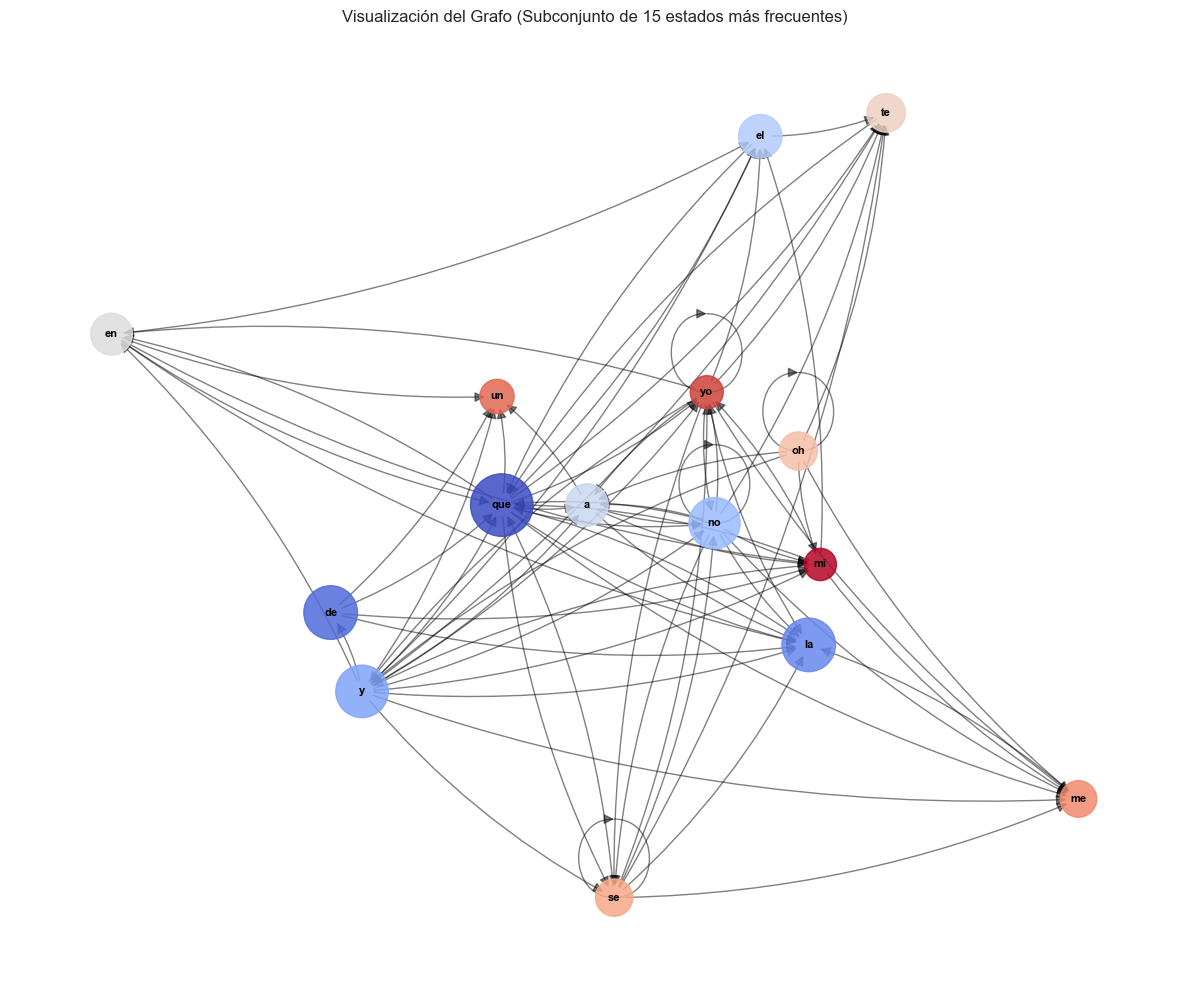

In [ ]:

if matriz_P_subconjunto.size > 0 and len(estados_subconjunto) > 0:

    G_sub = nx.from_numpy_array(matriz_P_subconjunto, create_using=nx.DiGraph)
    

    mapeo_nodos_grafo = {i: palabra for i, palabra in enumerate(estados_subconjunto)}
    G_sub = nx.relabel_nodes(G_sub, mapeo_nodos_grafo)
    
    print(f"\nGrafo del subconjunto construido con {G_sub.number_of_nodes()} nodos y {G_sub.number_of_edges()} aristas.")

    # --- Clases de Comunicación ---
    print("\nAnálisis de Clases de Comunicación:")
    # Un componente fuertemente conectado es un conjunto de nodos tal que hay un camino dirigido de cada nodo a cualquier otro en el componente.
    componentes_fc = list(nx.strongly_connected_components(G_sub))
    num_componentes_fc = len(componentes_fc)
    print(f"Número de clases de comunicación (componentes fuertemente conectados) en el subgrafo: {num_componentes_fc - 1}")

    es_irreducible_subgrafo_nx = (num_componentes_fc == 1 and G_sub.number_of_nodes() > 0)
    
    if es_irreducible_subgrafo_nx:
        print("El subgrafo analizado es irreducible. ")
    else:
        print("El subgrafo analizado es reducible.")


    # --- Periodicidad ---
    print("\nAnálisis de Periodicidad:")
    
    es_aperiodica_subgrafo_nx = False 
    if es_irreducible_subgrafo_nx: 
        try:
            if nx.is_aperiodic(G_sub):
                print("El subgrafo analizado (siendo irreducible) es aperiódico (periodo 1).")
                es_aperiodica_subgrafo_nx = True
            else:
                # Para un grafo fuertemente conectado, todos los nodos tienen el mismo periodo.
                periodo_subgrafo_val = nx.period(G_sub)
                print(f"El subgrafo analizado (siendo irreducible) es periódico con periodo = {periodo_subgrafo_val}.")
        except nx.NetworkXError as e:
            print(f"No se pudo determinar la periodicidad global del subgrafo (puede ser por desconexión inesperada): {e}")
            print("  Esto es inusual para subgrafos de texto que son fuertemente conectados.")
        except Exception as e_gen: # Captura general por si hay otros problemas
            print(f"Error inesperado al calcular periodicidad: {e_gen}")
            
    else: 
        # Si hay al menos un componente, podríamos intentar analizar el más grande
        if componentes_fc:
            componente_mas_grande = max(componentes_fc, key=len)
            if len(componente_mas_grande) > 1: # Necesita al menos 2 nodos para un análisis de periodicidad significativo
                subgrafo_componente = G_sub.subgraph(componente_mas_grande) 
                if nx.is_strongly_connected(subgrafo_componente): # Debe serlo por definición de SCC
                    try:
                        if nx.is_aperiodic(subgrafo_componente):
                            print(f"  El componente fuertemente conectado más grande ({len(subgrafo_componente) + 1} nodos) es aperiódico.")
                        else:
                             print(f"  El componente fuertemente conectado más grande es periódico con periodo {nx.period(subgrafo_componente)}.")
                    except nx.NetworkXError:
                         print("  No se pudo determinar la periodicidad del componente más grande.")
                         
    # --- Visualización del Subgrafo ---
    print("\nVisualización del Subgrafo de Transiciones:")
    if G_sub.number_of_nodes() > 0:
        if G_sub.number_of_nodes() <= 30: # Solo visualizar si no es demasiado grande para ser legible
            plt.figure(figsize=(max(12, G_sub.number_of_nodes()//2), max(10, G_sub.number_of_nodes()//2.5))) # Ajustar tamaño dinámicamente
            # Layouts: spring_layout, kamada_kawai_layout, circular_layout, spectral_layout
            pos = nx.kamada_kawai_layout(G_sub) 
            
            # Dibujar nodos
            node_sizes = [50000 * dist_inicial_series.get(node, 0.001) for node in G_sub.nodes()] # Tamaño según frecuencia
            node_sizes = [max(s, 500) for s in node_sizes] # Tamaño mínimo
            nx.draw_networkx_nodes(G_sub, pos, node_size=node_sizes, 
                                   node_color=range(len(G_sub.nodes())), cmap=plt.cm.coolwarm, alpha=0.85)
            
            # Dibujar aristas
            # Ponderar grosor de arista por probabilidad (opcional, puede saturar)
            # edge_widths = [G_sub[u][v]['weight'] * 5 for u,v in G_sub.edges()]
            nx.draw_networkx_edges(G_sub, pos, arrowstyle='-|>', arrowsize=15, alpha=0.5, # width=edge_widths,
                                   connectionstyle='arc3,rad=0.1') # Aristas curvas para mejor visualización
            
            # Etiquetas de nodos
            labels_nodos = {node: node for node in G_sub.nodes()}
            nx.draw_networkx_labels(G_sub, pos, labels_nodos, font_size=8, font_weight='bold')

            
            
            plt.title(f"Visualización del Grafo (Subconjunto de {G_sub.number_of_nodes()} estados más frecuentes)")
            plt.axis('off') # No mostrar ejes
            plt.tight_layout()
            plt.show()
        else:
            print("El subgrafo es demasiado grande (>30 nodos) para una visualización clara en este formato.")
            print("Se omite el dibujo del grafo completo del subconjunto.")
    else:
        print("El grafo del subconjunto está vacío, no se puede visualizar.")
        
else:
    print("\nEl modelo de Markov o el vocabulario están vacíos. No se puede realizar el análisis con NetworkX.")
    # Definir es_irreducible_subgrafo_nx y es_aperiodica_subgrafo_nx para la siguiente por si acaso
    es_irreducible_subgrafo_nx = False
    es_aperiodica_subgrafo_nx = False